<h1><font color="#113D68" size=6>Deep Learning con Python y Keras</font></h1>

<h1><font color="#113D68" size=5>Parte 7. Conceptos avanzados</font></h1>

<h1><font color="#113D68" size=4>1. Prácticas en Keras</font></h1>

<br><br>
<div style="text-align: right">
<font color="#113D68" size=3>Manuel Castillo Cara</font><br>

</div>

<a id="section0"></a>
# <font color="#004D7F" size=5> Contexto</font>

A lo largo de esta práctica vamos a tratar de resumir todos los conceptos vistos hasta ahora en prácticas, pero esta vez utilizando Keras:
* Definición de un grafo
* Entrenamiento de una red
* Capas de la red
* Carga de grandes bases de datos
* Data augmentation

Para ver todo esto, vamos a trabajar con dos bases de datos:
* MNIST: la base de datos de números nos servirá para definir los conceptos básicos. 
* VGG 102 Category Flowers: la base de datos utilizada en las prácticas anteriores, que consiste en un problema de clasificación de imágenes y con el que veremos redes con capas más complejas, como cargar grandes bases de datos y el data augmentation.

---

<a id="indice"></a>
<h2><font color="#004D7F" size=5>Índice</font></h2>

* [1. Introducción](#section1)
* [2. Conceptos básicos](#section2)
    * [2.1. MNIST](#section2.1)
    * [2.2. Grafo](#section2.2)
    * [2.3. Entrenamiento](#section2.3)
    * [2.4. Predicción y validación](#section2.4)
* [3. Conceptos avanzados](#section3)
    * [3.1. VGG 102 Category Flowers](#section3.1)
    * [3.2. Red Convolucional](#section3.2)
        * [summary](#section3.2.1)
        * [get_config](#section3.2.2)
    * [3.3. Entrenamiento y validación](#section3.3)
    * [3.4. Data Augmentation](#section3.4)


In [4]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import skimage
import keras

%matplotlib inline

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# Establecemos una semilla para numpy y tensorflow para poder reproducir la ejecución y los resultados
SEED = 1000
np.random.seed(SEED)
tf.random.set_seed(SEED)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<a id="section1"></a>
# <font color="#004D7F" size=6> 1. Introducción</font>

En esta práctica vamos a ver Keras, una de las APIs más importantes de Deep Learning escrita en Pyhton y que ofrece una capa de abstracción sobre librerías como TensorFlow o Theano.

El objetivo de Keras es simplificar lo máximo posible la definición de los grafos, haciendo más fácil la tarea al usuario, pero sin perder la modularidad. Otro de sus puntos fuertes es la facilidad para crear nuevos módulos propios que extienden su funcionalidad. Y lo más importante, es Python. Por poneros un ejemplo, en Keras el entrenamiento se realiza mediante la función `fit`.

En la siguiente gráfica vemos la importancia tanto de TensorFlow como de Keras en el panorama actual. [+ info](https://www.experfy.com/blog/deep-learning-framework-power-scores-2018)

<img src="https://pbs.twimg.com/media/DXy_uc0VAAAIhKG.jpg" width="500">

Esta clara la importancia de TensorFlow cuando hablamos de Deep Learning, por eso las prácticas anteriores se han dedicado exclusivamente a esta librería. Sin embargo, como habéis visto, Keras también es muy utilizada y esto se debe en gran parte a su sencillez y que, en realidad, cuando trabajemos con Keras, por debajo se ejecutará TensorFlow.

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section2"></a>
# <font color="#004D7F" size=6>2. Conceptos básicos</font>

En esta sección vamos a ver como diseñar, entrenar y validar una red neuronal con Keras y para ello vamos a usar la base de datos MNIST. Esta red va a estar compuesta por capas **Fully Connected** o densas y la función de activación va a ser **"ReLU"**.

<a id="section2.1"></a>
# <font color="#004D7F" size=5>2.1. MNIST</font>

Antes de empezar vamos a repasar en que consiste la base de datos MNIST y a cargar los datos. MNIST es una base de datos que consta de imágenes de tamaño 28x28 de dígitos escritos a mano que van del 0 al 9 y que han sido etiquetadas con el número representado en la imagen. Inicialmente, tenemos 60.000 imágenes en el conjunto de train y 10.000 en el de test, sin embargo, el conjunto de train lo vamos a partir en entrenamiento y validación, siguiendo las prácticas anteriores.

In [5]:
# keras ya nos da una función con la que cargar esta base de datos
from keras.datasets import mnist
from sklearn.model_selection import train_test_split

(x_train_valid, y_train_valid), (x_test, y_test) = mnist.load_data()

x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_valid, y_train_valid, test_size=0.1, random_state=SEED, stratify=y_train_valid)

print("Dimensiones del conjunto de características de train: {}".format(x_train.shape))
print("Dimensiones del conjunto de etiquetas de train: {}".format(y_train.shape))
print()
print("Dimensiones del conjunto de características de valid: {}".format(x_valid.shape))
print("Dimensiones del conjunto de etiquetas de valid: {}".format(y_valid.shape))
print()
print("Dimensiones del conjunto de características de test: {}".format(x_test.shape))
print("Dimensiones del conjunto de etiquetas de test: {}".format(y_test.shape))

Dimensiones del conjunto de características de train: (54000, 28, 28)
Dimensiones del conjunto de etiquetas de train: (54000,)

Dimensiones del conjunto de características de valid: (6000, 28, 28)
Dimensiones del conjunto de etiquetas de valid: (6000,)

Dimensiones del conjunto de características de test: (10000, 28, 28)
Dimensiones del conjunto de etiquetas de test: (10000,)


In [6]:
def show_images(images, gray=True):
    fig=plt.figure(figsize=(8, 8))
    index = np.random.randint(len(images), size=100)
    for i in range(100):
        fig.add_subplot(10, 10, i+1)
        plt.axis('off')
        if gray:
            color = 'gray'
        else:
            color = None
        plt.imshow(images[index[i]], cmap=color)
    plt.show()

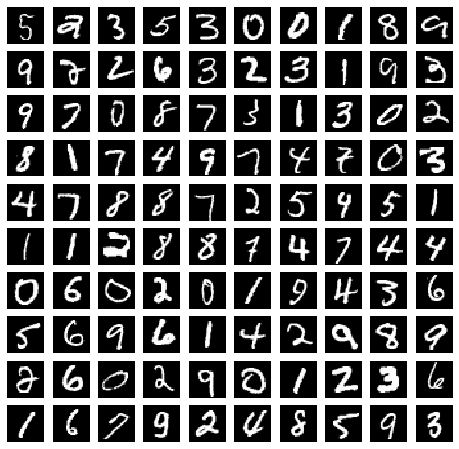

In [7]:
show_images(x_train)

Como vamos a ver conceptos básicos de Keras, es mejor tener las imágenes como un vector de características, por lo que vamos a "aplanar" nuestras imágenes de train y test en una matriz de 2 dimensiones. Además, vamos a normalizar los valores entre 0 y 1, para ello dividimos entre 255, ya que los valores en escala de grises van del 0 al 255.

Y, al igual que en todos los problemas multiclase en deep learning, hay que convertir los valores a codificación **one hot** para poder trabajar con ellos. Lo vamos a dejar ya preparado con la función `to_categorical` de `keras.utils`.

In [8]:
x_train = x_train.astype('float32')
x_train /= 255
x_train = x_train.reshape(x_train.shape[0],-1)
y_train = keras.utils.to_categorical(y_train, num_classes=10)
print("Dimensiones del conjunto de características de train aplanadas: {}".format(x_train.shape))
print("Dimensiones del conjunto de etiquetas de train en one hot: {}".format(y_train.shape))
print()

x_valid = x_valid.astype('float32')
x_valid /= 255
x_valid = x_valid.reshape(x_valid.shape[0],-1)
y_valid = keras.utils.to_categorical(y_valid, num_classes=10)
print("Dimensiones del conjunto de características de train aplanadas: {}".format(x_valid.shape))
print("Dimensiones del conjunto de etiquetas de train en one hot: {}".format(y_valid.shape))
print()


x_test = x_test.astype('float32')
x_test /= 255
x_test = x_test.reshape(x_test.shape[0],-1)
y_test = keras.utils.to_categorical(y_test, num_classes=10)
print("Dimensiones del conjunto de características de test aplanadas: {}".format(x_test.shape))
print("Dimensiones del conjunto de etiquetas de test en one hot: {}".format(y_test.shape))

Dimensiones del conjunto de características de train aplanadas: (54000, 784)
Dimensiones del conjunto de etiquetas de train en one hot: (54000, 10)

Dimensiones del conjunto de características de train aplanadas: (6000, 784)
Dimensiones del conjunto de etiquetas de train en one hot: (6000, 10)

Dimensiones del conjunto de características de test aplanadas: (10000, 784)
Dimensiones del conjunto de etiquetas de test en one hot: (10000, 10)


<a id="section2.2"></a>
# <font color="#004D7F" size=5>2.2. Grafo</font>

Existen dos formas de definir un grafo en Keras: `Sequential` y `Model`. En resumen, `Sequential` es más fácil de usar que `Model`, pero es más restrictivo en cuanto a las entradas/salidas y las conexiones entre diferentes capas.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Podéis consultar mejor las diferencias en la [documentación de Keras](https://keras.io/models/about-keras-models/) o en este [artículo](https://jovianlin.io/keras-models-sequential-vs-functional/).


Nosotros vamos a utilizar `Sequential`. Este objeto define un grafo lineal, donde las capas se van interconectando por en el orden en el que las vamos añadiendo. Trabajar con `Sequential` es igual que utilizar una lista de python, donde con la función `add()` vamos añadiendo capas. Además, también podemos inicializar el objeto con una lista. 

Veamos un ejemplo de ambos casos definiendo una red para MNIST con dos capas ocultas `Fully connected` (`Dense` en Keras) con 32 nodos cada una, `ReLU` como función de activación y `softmax` en la salida.

In [30]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(32, input_shape=(784,), activation='relu')) # Primera capa oculta
model.add(Dense(32, activation='relu')) # Segunda capa oculta
model.add(Dense(10, activation='softmax')) # Salida (10 clases)

Si os fijáis, en ambos modelos, en la primera capa se ha añadido `input_shape`. Esto hay que hacerlo obligatoriamente en la primera y sólo en la primera capa de todos los modelos, indicando el tamaño de la entrada. Este valor es 784 (28*28) que corresponde con el número de pixels de las imágenes de MNIST.

<a id="section2.3"></a>
# <font color="#004D7F" size=5>2.3. Entrenamiento</font>

El siguiente paso es definir el aprendizaje, es decir, la función de perdida (`loss`) y el optimizador. Keras define estos conceptos mediante la función `compile`. Esta función tiene como parámetros de entrada `loss` y `optimizer`, que pueden ser definidos mediante `string`, para usar una función concreta con sus valores por defecto, o un objeto que defina la función. Además, podemos añadir diferentes métricas que se calcularán durante el proceso de aprendizaje y de validación.

Vamos a ver unos ejemplos de como funciona.

<div class="alert alert-block alert-info">
<i class="fa fa-info-circle" aria-hidden="true"></i>
Podéis consultar la lista de funciones [`loss`](https://keras.io/losses/) disponibles en Keras en  y los [`optimizer`](https://keras.io/optimizers/)
</div>

In [20]:
# Ejemplo con las funciones predefinidas y con valores por defecto
model.compile(loss='categorical_crossentropy', optimizer='sgd')
# Podemos añadir métricas (estas metricas no se van a usar para el entrenamiento)
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['acc'])

Ejemplo con la función de optimización con otra configuración.

Realmente las funciones de `loss` ya vienen predefinidas y no tienen parámetros de configuración

In [31]:
from keras.optimizers import SGD
sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['acc'])

Y ya sólo nos queda realizar el entrenamiento con la función `fit` como si de un algoritmo de SciKit se tratase. Esta función tiene como parámetros de entrada la matriz de características, las clases, el número de epochs y el tamaño del batch y devuelve un objeto History con información sobre el entrenamiento, como el `loss` obtenido o las `metrics` que hayamos indicado en `compile`.

In [32]:
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=20, batch_size=128)

Epoch 1/20
422/422 [==============================] - 1s 1ms/step - loss: 1.7882 - acc: 0.4442 - val_loss: 1.1276 - val_acc: 0.7222
Epoch 2/20
422/422 [==============================] - 1s 1ms/step - loss: 0.7845 - acc: 0.7966 - val_loss: 0.5934 - val_acc: 0.8387
Epoch 3/20
422/422 [==============================] - 0s 1ms/step - loss: 0.5022 - acc: 0.8629 - val_loss: 0.4589 - val_acc: 0.8738
Epoch 4/20
422/422 [==============================] - 0s 1ms/step - loss: 0.4118 - acc: 0.8853 - val_loss: 0.4043 - val_acc: 0.8870
Epoch 5/20
422/422 [==============================] - 0s 1ms/step - loss: 0.3680 - acc: 0.8957 - val_loss: 0.3727 - val_acc: 0.8938
Epoch 6/20
422/422 [==============================] - 0s 1ms/step - loss: 0.3409 - acc: 0.9020 - val_loss: 0.3513 - val_acc: 0.9008
Epoch 7/20
422/422 [==============================] - 0s 1ms/step - loss: 0.3214 - acc: 0.9065 - val_loss: 0.3361 - val_acc: 0.9052
Epoch 8/20
422/422 [==============================] - 0s 1ms/step - loss: 0.

In [33]:
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


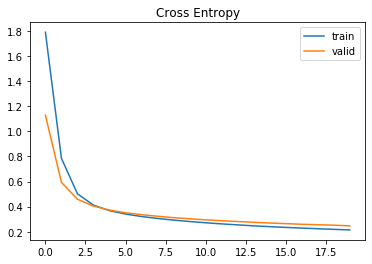

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','valid'])
plt.title('Cross Entropy')
plt.show()

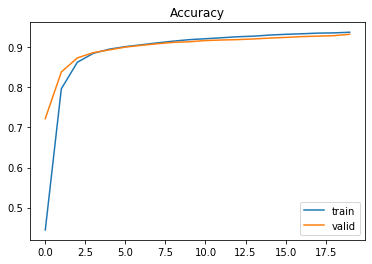

In [35]:
# Mostramos la evolución del accuracy a través de los epoch
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['train','valid'])
plt.title('Accuracy')
plt.show()

<a id="section2.4"></a>
# <font color="#004D7F" size=5>2.4. Predicción y test</font>

El objeto `Sequential` además incluye funciones para obtener las predicciones de nuevos casos y de obtener automáticamente los resultados siguiendo las métricas que hayamos indicado.

Vamos a ver primero como sería el proceso de predicción, para un subconjunto de imágenes de test. Para ello contamos con varias funciones, al igual que pasaba con SciKit, que son:
* `predict`: la salida de la última capa.
* `predict_proba`: las probabilidades normalizadas de las salidas (si nuestra red ya incluye softmax al final, el resultado es el mismo que la función anterior).
* `predict_class`: la clase predicha, equivalente al argmax a las funciones anteriores.

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


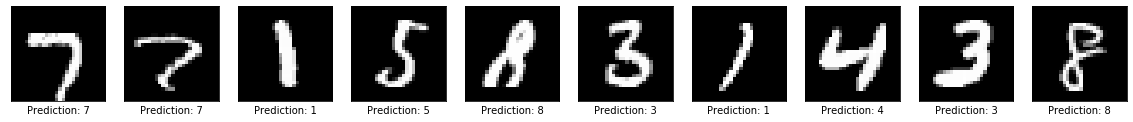

In [36]:
# En este caso nos quedamos con las clases
predictions = model.predict_classes(x_test)

# Mostramos algunos digitos con las clases predichas
fig=plt.figure(figsize=(20, 8))
index = np.random.randint(len(x_test), size=10)
for i in range(10):
    fig_i = fig.add_subplot(1, 10, i+1)
    fig_i.set_xticks(())
    fig_i.set_yticks(())
    fig_i.set_xlabel("Prediction: {}".format(predictions[index[i]]))
    plt.imshow(x_test[index[i]].reshape((28,28)), cmap='gray')
plt.show()

Nada mal, ahora vamos a obtener algunos resultados sobre el test. Para ello utilizamos `evaluate`, que nos devolverá los valores `loss` y las `metrics` para un conjunto de test.

In [37]:
score = model.evaluate(x_test, y_test)
print()
print("Loss: {}\nAccuracy: {}".format(score[0],score[1]))

313/313 [==============================] - 0s 593us/step - loss: 0.2142 - acc: 0.9381

Loss: 0.21421925723552704
Accuracy: 0.9380999803543091


---

<h3><font color="#004D7F" size=5> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> Ejercicio opcional </font></h3>

Los resultados no son malos, pero se pueden mejorar. Por eso, en este primer ejercicio se pide que trateis de mejorar la tasa de acierto, modificando la red y/o el optimizador.

In [0]:
#TODO

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section3"></a>
# <font color="#004D7F" size=6>3. Conceptos avanzados</font>

Una vez visto como hacer un grafo y entrenarlo en Keras, vamos a ver otras capas como las convolucionales, dropout, normalización, y para ello esta vez vamos a tratar un problema un poco más complejo, **VGG 102 Category Flowers**.

<a id="section3.1"></a>
# <font color="#004D7F" size=5>3.1. VGG 102 Category Flowers</font>

Este problema ya lo hemos visto en prácticas anteriores, por lo que vamos a cargar la base de datos que se generó en la práctica 3 de preprocesamiento de imágenes. Recordemos que se trata de un problema de clasificación de imágenes donde la clase es una de las 102 posibles etiquetas que representan flores que aparecen en la foto.

In [41]:
import sys
import time
import urllib.request
import tarfile

def reporthook(count, block_size, total_size):
    # From: https://blog.shichao.io/2012/10/04/progress_speed_indicator_for_urlretrieve_in_python.html
    global start_time
    if count == 0:
        start_time = time.time()
        return
    duration = time.time() - start_time
    progress_size = int(count * block_size)
    speed = int(progress_size / (1024 * duration))
    percent = int(count * block_size * 100 / total_size)
    sys.stdout.write("\r...%d%%, %d MB, %d KB/s, %d seconds passed" %
                    (percent, progress_size / (1024 * 1024), speed, duration))
    sys.stdout.flush()

# Download and extract
data_url = 'http://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz'
urllib.request.urlretrieve(data_url, 'vgg102flowers.tar.gz', reporthook)
tar = tarfile.open('vgg102flowers.tar.gz', "r:gz")
tar.extractall()
tar.close()

labels_url = 'http://www.robots.ox.ac.uk/~vgg/data/flowers/102/imagelabels.mat'
urllib.request.urlretrieve(labels_url, 'vgg102flowers_targets.mat', reporthook)

...1631%, 0 MB, 75573 KB/s, 0 seconds passeded

('vgg102flowers_targets.mat', <http.client.HTTPMessage at 0x7f263a698b38>)

In [43]:
from glob import glob
from scipy.io import loadmat

# Files
files = np.array(sorted(glob("jpg/*")))

# Targets
mat = loadmat('vgg102flowers_targets.mat')
labels = mat['labels'][0] - 1

# Random permute (we can also shuffle the dataset)
idx = np.random.permutation(len(files))
files = files[idx]
labels = labels[idx]

# Load classes names
# From: https://github.com/jimgoo/caffe-oxford102
names = ['pink primrose', 'hard-leaved pocket orchid', 'canterbury bells', 'sweet pea', 'english marigold', 'tiger lily', 'moon orchid', 'bird of paradise', 'monkshood', 'globe thistle', 'snapdragon', "colt's foot", 'king protea', 'spear thistle', 'yellow iris', 'globe-flower', 'purple coneflower', 'peruvian lily', 'balloon flower', 'giant white arum lily', 'fire lily', 'pincushion flower', 'fritillary', 'red ginger', 'grape hyacinth', 'corn poppy', 'prince of wales feathers', 'stemless gentian', 'artichoke', 'sweet william', 'carnation', 'garden phlox', 'love in the mist', 'mexican aster', 'alpine sea holly', 'ruby-lipped cattleya', 'cape flower', 'great masterwort', 'siam tulip', 'lenten rose', 'barbeton daisy', 'daffodil', 'sword lily', 'poinsettia', 'bolero deep blue', 'wallflower', 'marigold', 'buttercup', 'oxeye daisy', 'common dandelion', 'petunia', 'wild pansy', 'primula', 'sunflower', 'pelargonium', 'bishop of llandaff', 'gaura', 'geranium', 'orange dahlia', 'pink-yellow dahlia?', 'cautleya spicata', 'japanese anemone', 'black-eyed susan', 'silverbush', 'californian poppy', 'osteospermum', 'spring crocus', 'bearded iris', 'windflower', 'tree poppy', 'gazania', 'azalea', 'water lily', 'rose', 'thorn apple', 'morning glory', 'passion flower', 'lotus', 'toad lily', 'anthurium', 'frangipani', 'clematis', 'hibiscus', 'columbine', 'desert-rose', 'tree mallow', 'magnolia', 'cyclamen ', 'watercress', 'canna lily', 'hippeastrum ', 'bee balm', 'ball moss', 'foxglove', 'bougainvillea', 'camellia', 'mallow', 'mexican petunia', 'bromelia', 'blanket flower', 'trumpet creeper', 'blackberry lily']

print("Loaded %d files." % len(files))

Loaded 8189 files.


In [44]:
from sklearn.model_selection import train_test_split

# Train/valid/test split
train_valid_files, test_files, train_valid_labels, test_labels = train_test_split(
    files, labels, test_size=0.2, random_state=1234, stratify=labels)
train_files, valid_files, train_labels, valid_labels = train_test_split(
    train_valid_files, train_valid_labels, test_size=0.25, random_state=5678, stratify=train_valid_labels)

print("Train: ", train_files.shape)
print("Valid: ", valid_files.shape)
print("Test: ", test_files.shape)

del train_valid_files, train_valid_labels

Train:  (4913,)
Valid:  (1638,)
Test:  (1638,)


Hasta aquí todo es igual que en la práctica 3 de preprocesamiento de imágenes. Ahora vamos a utilizar las funciones de **Keras** para preparar un iterador que recorra las imágenes de la carpeta y así poder entrenar nuestra red neuronal. Extisten varias opciones para realizar este iterador, así como formas de hacer data augmentation y de extender dichas opciones a las predefinidas en Keras. Se recomienda echar un vistazo a la página de [procesamiento de imágenes.](https://keras.io/preprocessing/image/)

En este caso vamos a empezar leyendo de un DataFrame de pandas con dos columnas, una con la ruta a la imagen y otra con la etiqueta correspondiente. Todo esto lo haremos a través de la clase `ImageDataGenerator`, que se divide en dos partes como veremos a continuación.

In [45]:
import pandas as pd

train_frame = pd.DataFrame(np.array([train_files, train_labels]).T, columns=['files','labels'])
valid_frame = pd.DataFrame(np.array([valid_files, valid_labels]).T, columns=['files','labels'])
test_frame = pd.DataFrame(np.array([test_files, test_labels]).T, columns=['files','labels'])

In [46]:
from keras.preprocessing.image import ImageDataGenerator

# cuando definimos ImageDataGenerator incluimos los preprocesamientos a realizar
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# y con esta indicamos como vamos a leer la información y de donde.
train_iter = train_datagen.flow_from_dataframe(train_frame, 
                                               x_col='files', 
                                               y_col='labels', 
                                               target_size=(100, 120), 
                                               class_mode='categorical',
                                               batch_size=32, 
                                               shuffle=True)

valid_iter = valid_datagen.flow_from_dataframe(valid_frame, 
                                               x_col='files', 
                                               y_col='labels', 
                                               target_size=(100, 120), 
                                               class_mode='categorical',
                                               batch_size=32, 
                                               shuffle=False)

test_iter = test_datagen.flow_from_dataframe(test_frame, 
                                             x_col='files', 
                                             y_col='labels', 
                                             target_size=(100, 120), 
                                             class_mode='categorical',
                                             batch_size=32, 
                                             shuffle=False)

Found 4913 validated image filenames belonging to 102 classes.
Found 1638 validated image filenames belonging to 102 classes.
Found 1638 validated image filenames belonging to 102 classes.


<a id="section3.2"></a>
# <font color="#004D7F" size=5>3.2. Red Convolucional</font>

En esta sección vamos a definir una red al estilo de AlexNet o como la que se vio en la práctica 4. Muchas de las redes convolucionales para el tratamiento de imágenes siguen estos patrones:
* 1 o varios bloques convolucionales compuestos, que incluye:
  * 1 o varias capas convolucionales, todas con activación ReLU
  * 1 capa Max Pooling
* 1 o varias capas densas o `Fully connected` con activación ReLU
* 1 capa de salida con softmax

Siguiendo este esquema, vamos a diseñar una red con dos capas convolucionales conpuestas, una densa y la salida de nuestro problema.

In [47]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD

# definimos el modelo lineal
model = Sequential()

# recordemos que en la primera capa hay que indicar el tamaño de la entrada
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(100, 120, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Antes de poder pasar de la capa convolucional a la densa, es necesario "aplanar" la salida, por eso se usa Flatten
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))

# finalmente creamos la capa de salida, con el tamaño de las etiquetas de nuestro problema
model.add(Dense(102, activation='softmax'))

Antes de continuar, vamos a ver unas funciones de Keras especialmente útiles para ver ciertos aspectos de las redes.

<a id="section3.2.1"></a>
## <font color="#004D7F" size=4>summary</font>
Esta función nos muestra una tabla con las capas que forman nuestra red, asi como su tamaño y el número de parámetros a entrenar por capa.

In [48]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 116, 32)       2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 58, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 44, 54, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 27, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 38016)             0         
_________________________________________________________________
dense_18 (Dense)             (None, 1024)              38929408  
_________________________________________________________________
dropout (Dropout)            (None, 1024)             

<a id="section3.2.2"></a>
## <font color="#004D7F" size=4>get_config</font>
Esta función nos devuelve la configuración de una red, en una estructura de diccionario y que se puede utilizar para inicializar otros modelos. Es una forma muy sencilla de exportar/importar la estructura de las redes.

In [49]:
model.get_config()

{'name': 'sequential_7',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 100, 120, 3),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'conv2d_input'}},
  {'class_name': 'Conv2D',
   'config': {'name': 'conv2d',
    'trainable': True,
    'batch_input_shape': (None, 100, 120, 3),
    'dtype': 'float32',
    'filters': 32,
    'kernel_size': (5, 5),
    'strides': (1, 1),
    'padding': 'valid',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'MaxPooling2D',
   'config': {'name': 'max_pooling2d',
    'trainable': True,
 

<a id="section3.3"></a>
# <font color="#004D7F" size=5>3.3. Entrenamiento y validación</font>

En este punto vamos a entrenar la red igual que hicimos en el problema de MNIST. Como estamos trabajando con un iterador, deberemos llamar a la función `fit_generator`, que se encarga de realizar el mismo proceso que `fit` pero con un generador. Además, deberemos indicar el numero de pasos o `steps` que tiene una `epoch`. Esto es, el número total de imágenes entre el tamaño del batch.

In [52]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['acc'])


history = model.fit(train_iter, steps_per_epoch = train_frame.shape[0]//train_iter.batch_size,
                              epochs=10, validation_data=valid_iter, 
                              validation_steps= valid_frame.shape[0]//valid_iter.batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
153/153 [==============================] - 101s 660ms/step - loss: 3.1901 - acc: 0.2209 - val_loss: 3.0236 - val_acc: 0.2451
Epoch 2/10
153/153 [==============================] - 97s 634ms/step - loss: 2.6966 - acc: 0.3108 - val_loss: 2.6504 - val_acc: 0.3156
Epoch 3/10
153/153 [==============================] - 102s 667ms/step - loss: 2.0456 - acc: 0.4575 - val_loss: 2.6562 - val_acc: 0.3358
Epoch 4/10
153/153 [==============================] - 98s 638ms/step - loss: 1.3760 - acc: 0.6310 - val_loss: 2.6575 - val_acc: 0.3719
Epoch 5/10
153/153 [==============================] - 90s 590ms/step - loss: 0.7831 - acc: 0.7753 - val_loss: 2.7520 - val_acc: 0.3775
Epoch 6/10
153/153 [==============================] - 93s 607ms/step - loss: 0.4754 - acc: 0.8607 - val_loss: 2.9817 - val_acc: 0.3487
Epoch 7/10
153/153 [==============================] - 91s 592ms/step - loss: 0.3073 - acc: 0.9162 - val_loss: 3.

In [55]:
score = model.evaluate(valid_iter, steps= valid_frame.shape[0]//valid_iter.batch_size)
print("loss en validación: {} \naccuracy en validación: {}".format(score[0],score[1]))
score = model.evaluate(test_iter, steps= test_frame.shape[0]//test_iter.batch_size)
print("loss en test: {} \naccuracy en test: {}".format(score[0],score[1]))

51/51 [==============================] - 11s 209ms/step - loss: 3.4002 - acc: 0.3621
loss en validación: 3.4001781940460205 
accuracy en validación: 0.36213234066963196
51/51 [==============================] - 10s 203ms/step - loss: 3.3121 - acc: 0.3873
loss en test: 3.312053918838501 
accuracy en test: 0.38725489377975464


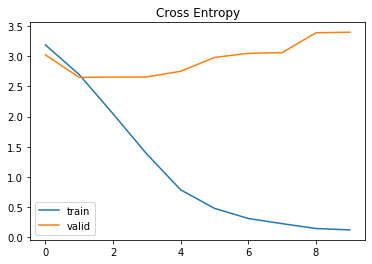

In [56]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','valid'])
plt.title('Cross Entropy')
plt.show()

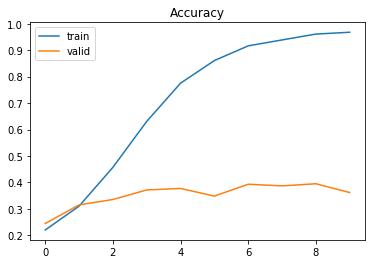

In [57]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['train','valid'])
plt.title('Accuracy')
plt.show()

Hemos alcanzado una tasa de acierto del 40%, tanto en validación como en test. No es un mal resultado para este problema ya que hay pocas imágenes. Sin embargo nos hemos encontrado con un grave problema de sobreajuste. Tenemos un problema y un modelo complejos, pero no tenemos datos suficientes para entrenar nuestra red. Trataremos de solucionar esto con el data augmentation.

Antes de continuar, si nos fijamos, tenemos parámetros correspondientes al tamaño de las capas convolucionales y densas, así como de max pooling, número de capas total, configuración del dropout y del optimizador. 

Conforme vamos aumentando la complejidad, hay más hiperparámetros que configurar. Cuanto mejores resultados busquemos, más tiempo tendremos que dedicar a configurar la red y entender los resultados que se obtienen de ella para nuestro problema. 

<a id="section3.4"></a>
# <font color="#004D7F" size=5>3.4. Data Augmentation</font>

En este apartado vamos a volver a trabajar los conceptos de data augmentation. Aunque Keras incluye muchas funciones para el diseño de grafos, en el caso del preprocesamiento de imágenes es más limitado. Como punto a favor, es que estas funciones son muy fáciles de usar y como se ha comentado antes, Keras tiene muchas herramientas para aumentar su funcionalidad, como son las funciones [Backend](https://keras.io/backend/) o el poder integrar funciones directamente de TensorFlow.

Vamos a continuar con el dataset de flores y para ello vamos a definir un nuevo `ImageDataGenerator` pero solo para el train. Esta clase la hemos visto más arriba, pero vamos a definirla un poco más en detalle, ya que se divide principalmente en dos partes:
* Primero, en el constructor definimos las operaciones o modificaciones que vamos a realizar a los datos.
* Segundo, con las funciones `flow` generamos un iterador que se va a encargar de leer los datos. Por eso los parámetros de entrada de las funciones `flow` indican donde se encuentran las imágenes, el formato de estas y el tamaño de salida. También indicamos aquí el tamaño del batch del iterador.

Con esto el iterador obtenido primero cargará el batch de datos según lo indicado en los parámetros de las funicones `flow` y luego aplicará las funciones definidas en el constructor de [`ImageDataGenerator`](https://keras.io/preprocessing/image/). Estas funciones consisten en data augmentation estocástico, es decir, cada operación que se ha indicado se aplica de forma aleatoria a las diferentes datos, en este caso imágenes, de los batches.

In [58]:
train_datagen_augmented = ImageDataGenerator(rescale=1./255, horizontal_flip = True, vertical_flip = True, rotation_range = 10)

train_iter_augmented = train_datagen_augmented.flow_from_dataframe(train_frame, 
                                                                   x_col='files', 
                                                                   y_col='labels', 
                                                                   target_size=(100, 120), 
                                                                   class_mode='categorical',
                                                                   batch_size=32, 
                                                                   shuffle=True)

Found 4913 validated image filenames belonging to 102 classes.


In [59]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD

# definimos el modelo lineal
model = Sequential()

# el primer bloque convolucional completo, formado de dos capas convolucionales con activación relu, 
# un max pooling y un dropout.

# recordemos que en la primera capa hay que indicar el tamaño de la entrada
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(100, 120, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Antes de poder pasar de la capa convolucional a la densa, es necesario "aplanar" la salida, por eso se usa Flatten
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))

# finalmente creamos la capa de salida, con el tamaño de las etiquetas de nuestro problema
model.add(Dense(102, activation='softmax'))

In [0]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['acc'])

history = model.fit(train_iter_augmented,
                              steps_per_epoch = train_frame.shape[0]//train_iter_augmented.batch_size,
                              epochs=10,
                              validation_data=valid_iter, 
                              validation_steps= valid_frame.shape[0]//valid_iter.batch_size)

Epoch 1/10
153/153 [==============================] - 57s 373ms/step - loss: 4.2380 - acc: 0.0605 - val_loss: 3.9334 - val_acc: 0.0922
Epoch 2/10
153/153 [==============================] - 53s 348ms/step - loss: 3.8139 - acc: 0.1017 - val_loss: 3.5536 - val_acc: 0.1482
Epoch 3/10
153/153 [==============================] - 54s 350ms/step - loss: 3.5142 - acc: 0.1450 - val_loss: 3.2032 - val_acc: 0.2055
Epoch 4/10
153/153 [==============================] - 53s 345ms/step - loss: 3.2633 - acc: 0.2001 - val_loss: 2.9572 - val_acc: 0.2435
Epoch 5/10
153/153 [==============================] - 53s 345ms/step - loss: 2.9838 - acc: 0.2504 - val_loss: 2.9423 - val_acc: 0.2553
Epoch 6/10
153/153 [==============================] - 53s 346ms/step - loss: 2.7872 - acc: 0.2954 - val_loss: 2.5991 - val_acc: 0.3244
Epoch 7/10
153/153 [==============================] - 53s 345ms/step - loss: 2.6030 - acc: 0.3287 - val_loss: 2.4518 - val_acc: 0.3618
Epoch 8/10
153/153 [==============================] - 5

In [0]:
score = model.evaluate(valid_iter, steps= valid_frame.shape[0]//valid_iter.batch_size)
print("loss en validación: {} \naccuracy en validación: {}".format(score[0],score[1]))
score = model.evaluate(test_iter, steps= test_frame.shape[0]//test_iter.batch_size)
print("loss en test: {} \naccuracy en test: {}".format(score[0],score[1]))

loss en validación: 2.25949728696759 
accuracy en validación: 0.41220423404781487
loss en test: 2.286028646955303 
accuracy en test: 0.4166666666666667


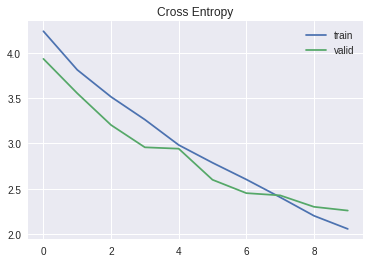

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','valid'])
plt.title('Cross Entropy')
plt.show()

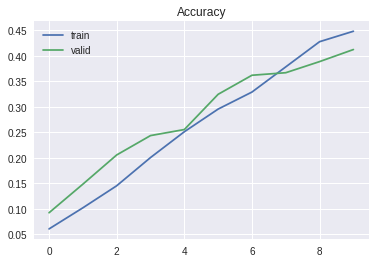

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['train','valid'])
plt.title('Accuracy')
plt.show()

Hemos visto claramente la utilidad del data augmentation y lo fácil que es aplicar dichas funciones con Keras. Con esto ya hemos repasado los puntos más importantes de Keras para poder empezar a trabajar con nuestras bases de datos, diseñar y entrenar nuestras redes y evaluar su comportamiento.

---

<h3><font color="#004D7F" size=5> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> Ejercicio opcional </font></h3>

Para terminar, al igual que antes, se deja un bloque para que el alumno pruebe diferentes estructuras tratando de mejorar los resultados obtenidos por la red, ya que actualmente solo hay 3 capas (2 convolucionales y 1 densa). Se recomienda también probar diferentes optimizadores y utilizar data augmentation.

In [0]:
# TODO

<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<div style="text-align: right"> <font size=6><i class="fa fa-coffee" aria-hidden="true" style="color:#004D7F"></i> </font></div>